# 1. Выбор исследуемого датасета.

Исследуемый датасет:
Digital Water Level Recorder (DWLR) Sensor Data
https://www.kaggle.com/datasets/alfredkondoro/digital-water-level-recorder-dwlr-sensor-data


# 2. О наборе данных.

Обзор набора данных:
Этот набор данных содержит ежедневные временные ряды, собранные в 2023 году с помощью цифрового регистратора уровня воды (Digital Water Level Recorder, DWLR). Эти данные дают представление о влиянии глобального потепления, сезонных погодных условий и изменений окружающей среды на деревенский колодец недалеко от Инчхона, Южная Корея.

1. Water Level
2. Temperature
3. Rainfall
4. pH Levels
5. Dissolved Oxygen

## Загрузка датасета.

In [40]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "alfredkondoro/digital-water-level-recorder-dwlr-sensor-data",
    "DWLR_Dataset_2023.csv"
)

print("Первые 5 записей:")
df.head()

100%|██████████| 36.1k/36.1k [00:00<00:00, 13.4MB/s]

Первые 5 записей:


,Date,Water_Level_m,Temperature_C,Rainfall_mm,pH,Dissolved_Oxygen_mg_L
0,2023-01-01,2.124836,-0.601831,26.958453,6.948386,8.282231
1,2023-01-02,2.099955,0.396578,15.306932,6.952946,7.998230
2,2023-01-03,2.146121,0.139768,29.263846,6.912783,8.173989
3,2023-01-04,2.196756,0.327833,8.246142,6.972447,8.079537
4,2023-01-05,2.115765,-0.917756,35.654194,6.962424,8.425726


# 3. Определение значений для каждого из атрибутов

In [41]:
# Проверка пропущенных значений
print("Пропущенные значения по столбцам:")
print(df.isnull().sum())

Пропущенные значения по столбцам:
Date                      0
Water_Level_m             0
Temperature_C             0
Rainfall_mm               0
pH                        0
Dissolved_Oxygen_mg_L    20
dtype: int64


In [42]:
# Удаление строк с пустыми значениями
df = df.dropna()
print("Пропущенные значения по столбцам:")
print(df.isnull().sum())

# Согласно полученным результатам, строки с пропусками были удалены успешно.

Пропущенные значения по столбцам:
Date                     0
Water_Level_m            0
Temperature_C            0
Rainfall_mm              0
pH                       0
Dissolved_Oxygen_mg_L    0
dtype: int64


In [43]:
# Среднее и СКО
print("\nСреднее значение и СКО по каждому признаку:")
stats = df.describe().loc[['mean', 'std']]
display(stats.T)


Среднее значение и СКО по каждому признаку:


,mean,std
Water_Level_m,3.436396,0.776117
Temperature_C,13.764955,8.198057
Rainfall_mm,105.708682,81.847900
pH,7.266794,0.620509
Dissolved_Oxygen_mg_L,8.778698,0.537379


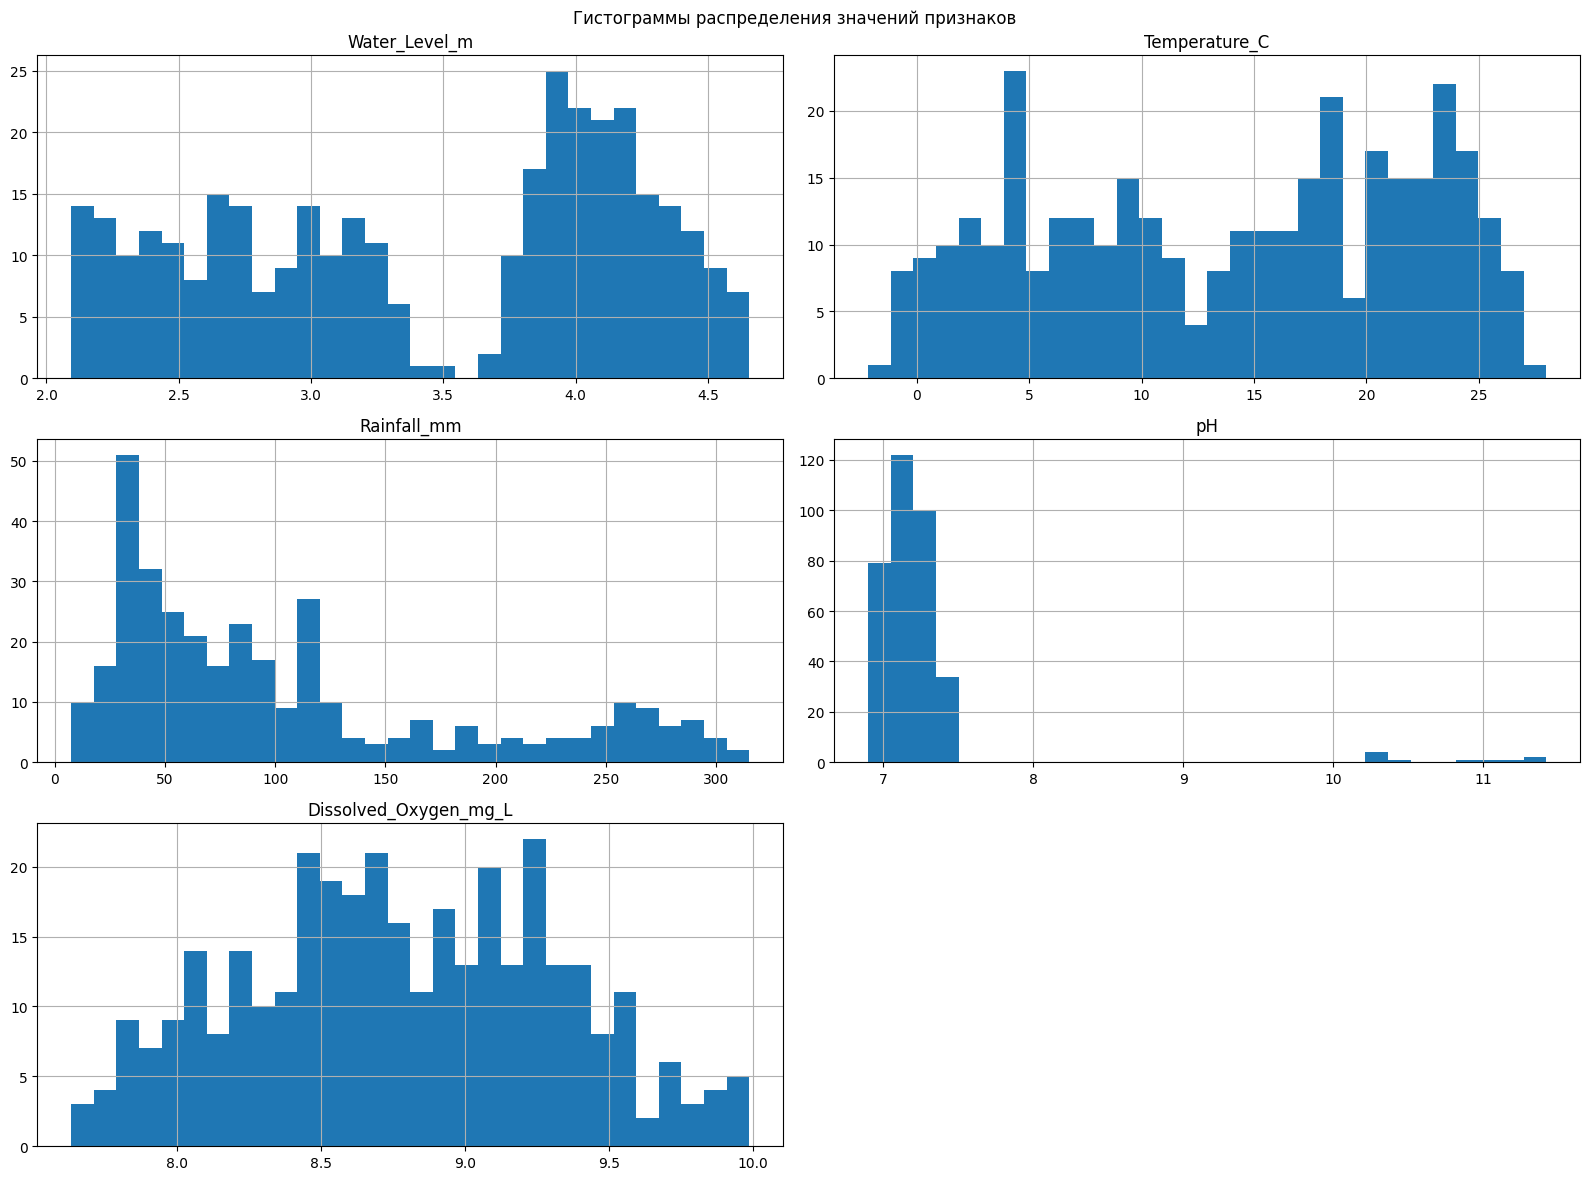

In [44]:
# Гистограммы распределения + визуальный поиск выбросов

# Построим гистограммы для всех признаков
df.hist(bins=30, figsize=(16, 12))
plt.suptitle("Гистограммы распределения значений признаков")
plt.tight_layout()
plt.show()

# Комментарий:
# Выбросы могут проявляться как очень редкие значения на "хвостах".
# Выбросы можно наблюдать у атрибута ph из-за наличия правого хвоста. На остальных графиках точно определить наличие выбросов проблематично.
# Точное определение выбросов можно сделать через IQR или Z-score, но для задания достаточно визуального анализа.

# 4. Определение корреляции между параметрами

In [ ]:
# Удаляем столбец даты для удобства вычислений
df = df.iloc[:, 1:]
print("Первые 5 записей:")
df.head()
#

Первые 5 записей:


,Water_Level_m,Temperature_C,Rainfall_mm,pH,Dissolved_Oxygen_mg_L
0,2.124836,-0.601831,26.958453,6.948386,8.282231
1,2.099955,0.396578,15.306932,6.952946,7.998230
2,2.146121,0.139768,29.263846,6.912783,8.173989
3,2.196756,0.327833,8.246142,6.972447,8.079537
4,2.115765,-0.917756,35.654194,6.962424,8.425726


In [47]:
# Вычислим корреляционную матрицу (Пирсона)
corr_matrix = df.corr()
print("Корреляционная матрица:")
corr_matrix

Корреляционная матрица:


,Water_Level_m,Temperature_C,Rainfall_mm,pH,Dissolved_Oxygen_mg_L
Water_Level_m,1.000000,0.464126,0.474209,0.270434,0.812378
Temperature_C,0.464126,1.000000,0.858949,0.090970,0.306134
Rainfall_mm,0.474209,0.858949,1.000000,0.106475,0.261296
pH,0.270434,0.090970,0.106475,1.000000,0.206249
Dissolved_Oxygen_mg_L,0.812378,0.306134,0.261296,0.206249,1.000000


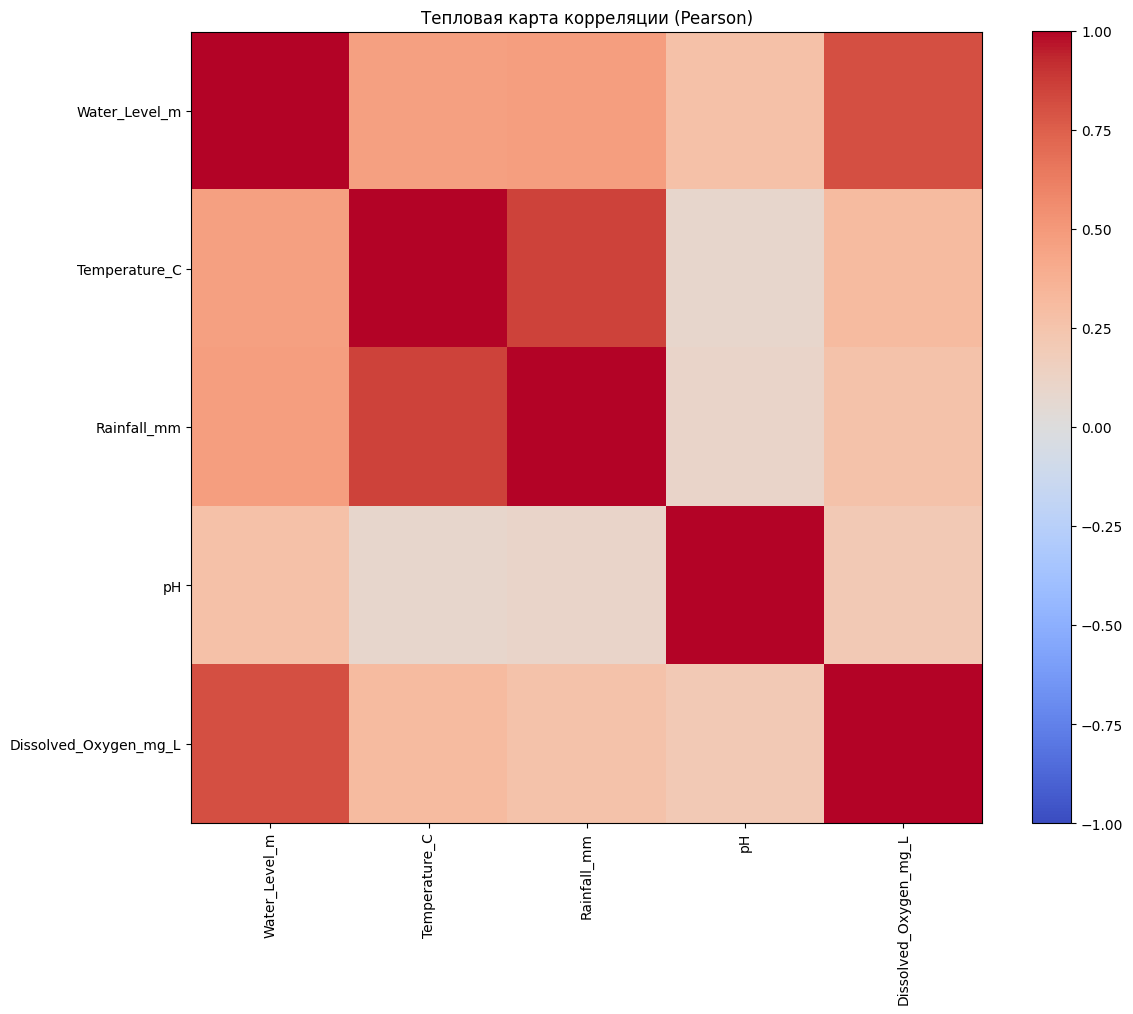

In [48]:
# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Тепловая карта корреляции (Pearson)")
plt.tight_layout()
plt.show()

Анализ корреляций:  
Высококоррелированные пары:
  - Dissolved_Oxygen_mg_L ↔ Water_Level_m (ожидаемо, чем выше уровень воды, тем больше может быть кислорода)
  - Rainfall_mm ↔ Temperature_C (положительная корреляция ~0,85)

Слабо/некоррелированные:
  - pH ↔ Temperature_C (слабое влияние)
  - pH ↔ Rainfall_mm (слабое влияние)

Построим матрицу графиков рассеивания для признаков

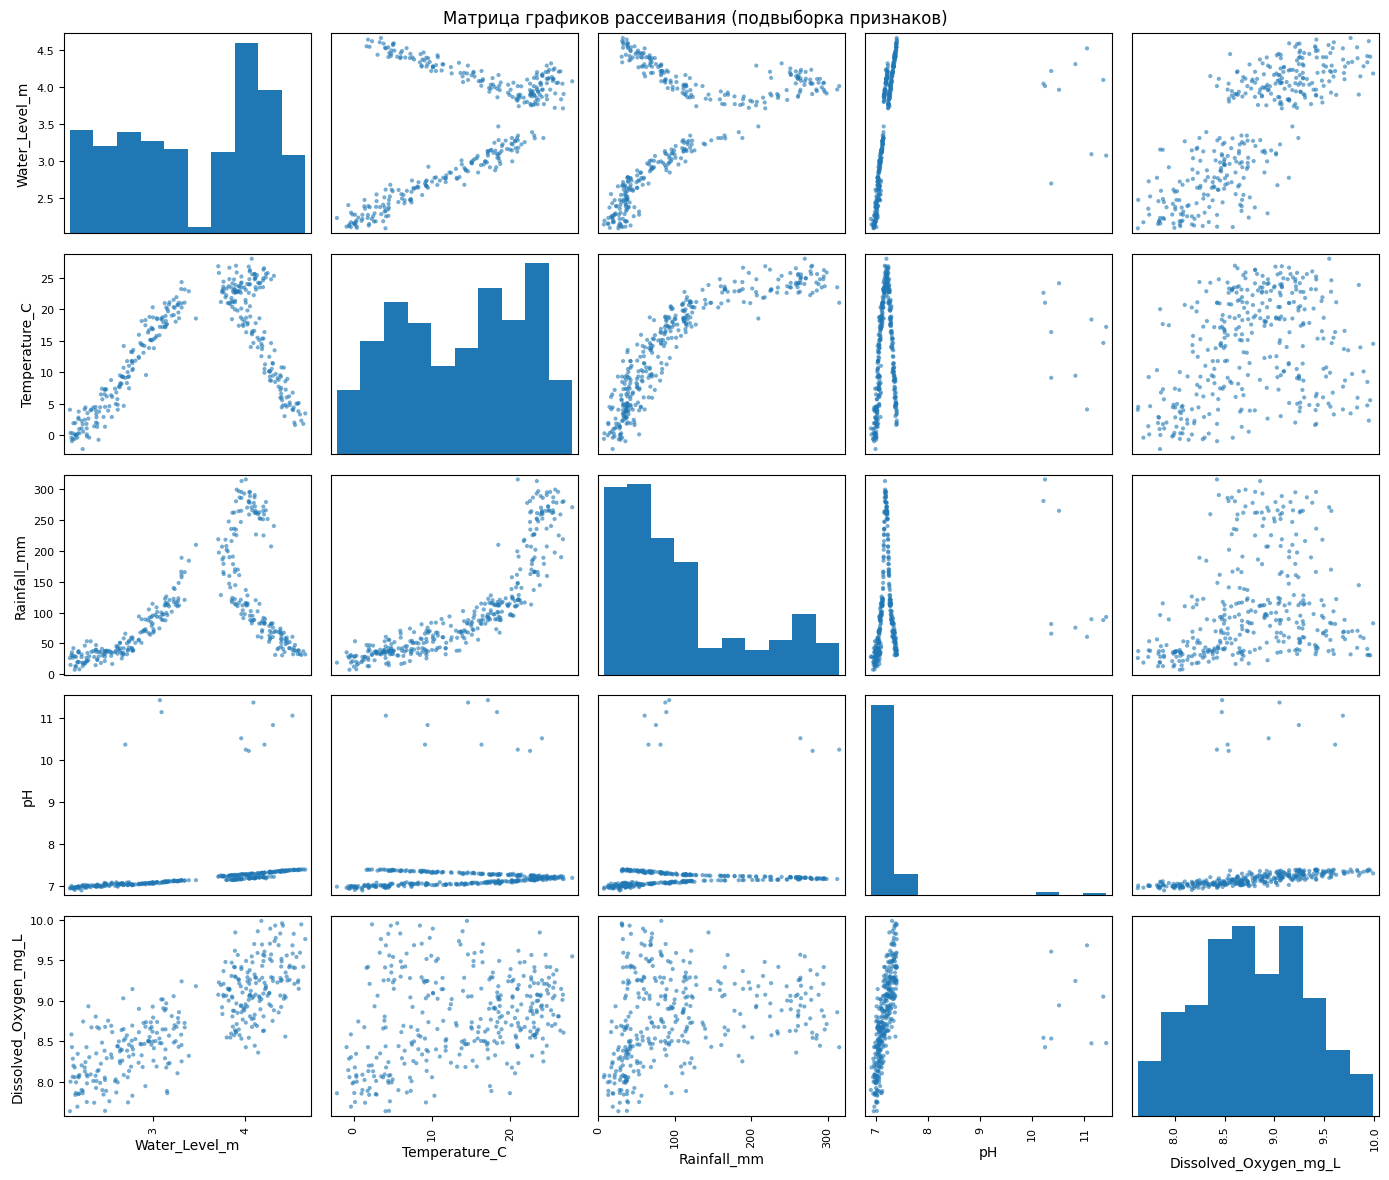

In [49]:
pd.plotting.scatter_matrix(df, alpha=0.6, figsize=(14, 12), diagonal='hist')
plt.suptitle("Матрица графиков рассеивания")
plt.tight_layout()
plt.show()

## Анализ полученных результатов

Анализ матрицы графиков рассеяния дает визуальное подтверждение выводам, полученным из корреляционной матрицы.

Это позволяет лучше понять данные и выбрать наиболее информативные признаки для дальнейшего исследования климатических характеристик.